<Figure size 432x288 with 0 Axes>

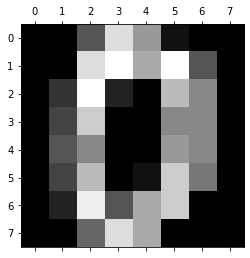

What is the number in the image? 0
[851]


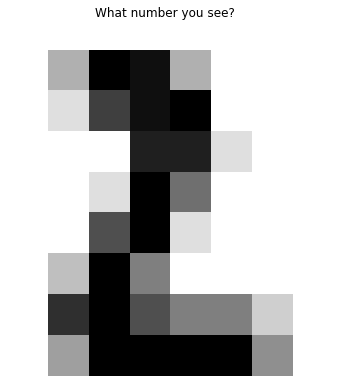

What is the number in the image? 2
[1684]


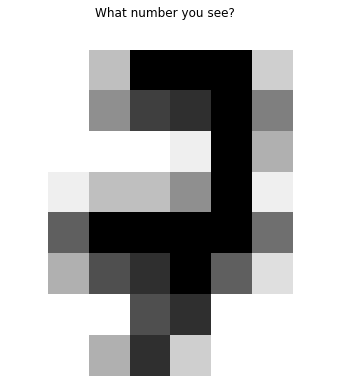

What is the number in the image? 3
[1374]


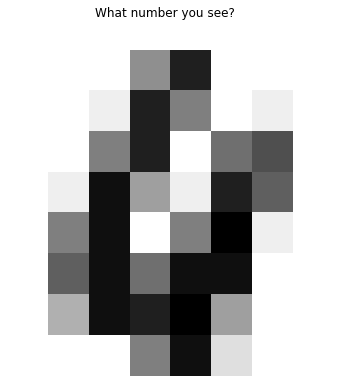

What is the number in the image? 4
[1458]


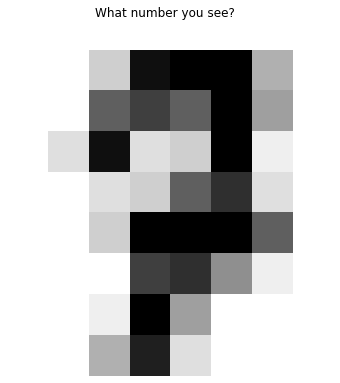

What is the number in the image? 7
[884]


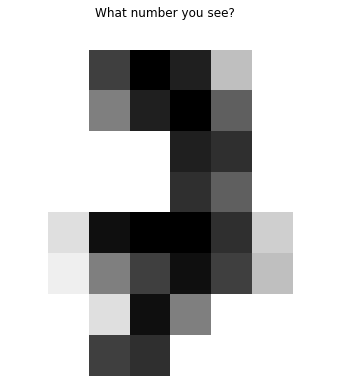

What is the number in the image? 2
[1514]


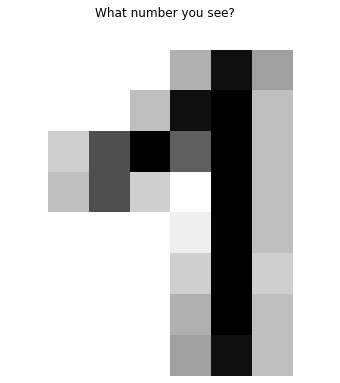

What is the number in the image? 7
[166]


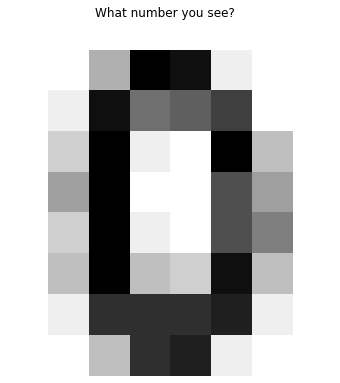

What is the number in the image? 0
[1666]


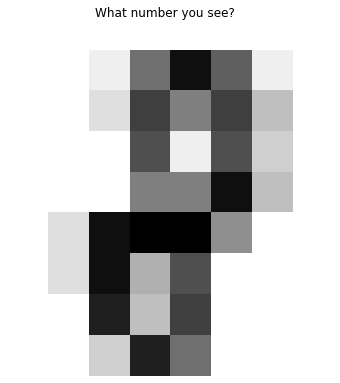

What is the number in the image? 8
[1718]


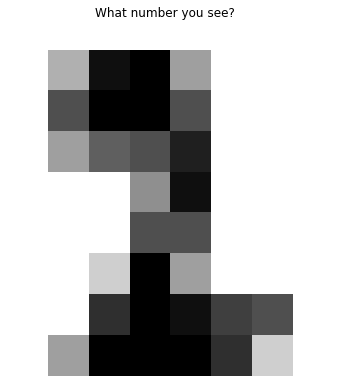

What is the number in the image? 2
[1213]


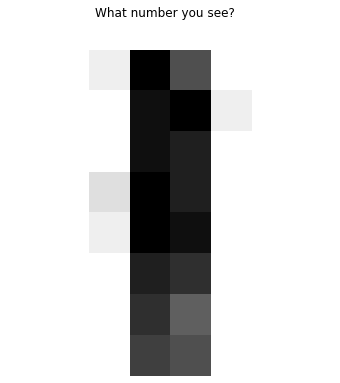

score 0.1


In [3]:
#Question 15.4
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

def show_digits():
    num = plt.figure(figsize=(6, 6))
    num.suptitle('What number you see?')
    rand = np.random.choice(len(digits.data), 1, replace=False)
    print(rand)
    for i in range(len(rand)):
        ax = num.add_subplot(1, 1, i + 1)
        ax.matshow(digits.images[rand[i]], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_axis_off()
    plt.show()
    return rand

user_score = 0
num_trials = 10

for i in range(num_trials):
    user_guess = int(input("What is the number in the image? "))
    answer = digits.target[show_digits()]
    if user_guess == answer:
        user_score += 1
print("score",user_score/num_trials)

In [8]:
#Question 15.12
import time
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

X, y = load_digits(return_X_y=True)

# Create a KNeighborsClassifier
clf = KNeighborsClassifier()

# Use the cross_validate function to calculate the computation times
cv_results = cross_validate(clf, X, y, cv=10, return_train_score=False,
scoring='accuracy', n_jobs=-1)

# computation times(?)
print('Computation times:')
print(cv_results['fit_time'])
print(cv_results['score_time'])

Computation times:
[0.00199556 0.00099754 0.00099683 0.00199342 0.00199485 0.0019958
 0.00099683 0.00099754 0.00099659 0.0009973 ]
[0.01695395 0.01695466 0.01695418 0.01795149 0.01695395 0.01795125
 0.01894832 0.01994491 0.02094412 0.01894903]


In [15]:
#Question 15.15
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()
#diabetes (this prints out diabetes db)

X = diabetes.data
Y = diabetes.target
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

#regression 
le = LinearRegression()
le.fit(train_x,train_y)

LinearRegression()

y_pred = le.predict(test_x)
result = pd.DataFrame({'Actual': test_y, 'Predict' : y_pred})

print('coefficient', le.coef_)
print('intercept', le.intercept_)
mean_squared_error(test_y,y_pred)
r2_score(test_y,y_pred)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1